In [17]:
owi_path_json= "/Users/ngumus/.owi/public/main/bdef16dc-25a7-11f0-9523-0242ac140003.json" 
owi_path=  "/Users/ngumus/.owi/public/main/bdef16dc-25a7-11f0-9523-0242ac140003/"

In [1]:
from typing import Optional
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



def plot_sentence_lengths(
    df: pd.DataFrame,
    text_col: str = 'text',
    label_col: str = 'label_text',
    word_count_col='sentence_length',
    figsize: tuple = (14, 6),
    bins: int = 30,
    rotation: int = 45,
    log_scale: bool = False,
    palette: Optional[str] = None,
    show_stats: bool = True
) -> None:
    
    """
    Plots sentence length distributions by class and overall.
    
    Args:
        df: Input DataFrame containing text and labels
        text_col: Name of column containing text (default 'text')
        label_col: Name of column containing class labels (default 'label_text')
        figsize: Figure size (default (14, 6))
        bins: Number of bins for histograms (default 30)
        rotation: X-tick rotation for class labels (default 45)
        log_scale: Whether to use log scale for y-axis (default False)
        palette: Color palette for plots (default None)
        show_stats: Whether to print length statistics (default True)
    """

        
    if word_count_col == 'sentence_length':
        df = df.copy()
        df['sentence_length'] = df[text_col].apply(lambda x: len(str(x).split()))
    
    if show_stats:
        print(df['sentence_length'].describe())
            
    
    # Set up figure
    plt.figure(figsize=figsize)
    
    # Plot 1: Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(
        data=df,
        x=word_count_col,
        bins=bins,
        kde=True,
        color='skyblue' if palette is None else None,
        palette=palette
    )
    plt.title('Overall Sentence Length Distribution')
    plt.xlabel('Number of Words')
    if log_scale:
        plt.yscale('log')
        plt.ylabel('Frequency (log scale)')
    else:
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [16]:
import os
import json
import pandas as pd

# Path to your directory with JSON files
dir_path = os.path.expanduser(owi_path)

# List to store JSON data
data = []

# Open and read the JSON file
with open(os.path.join(dir_path, owi_path_json), 'r') as file:
    # Load the JSON data into a Python object
    json_data = json.load(file)
    
    # Create a new dictionary to hold the scalar values
    scalar_data = {}
    for key, value in json_data.items():
        if not isinstance(value, (list, dict)):
            scalar_data[key] = value
    
    # Append the scalar data to the list
    data.append(scalar_data)

# Create a pandas DataFrame from the JSON data
df = pd.DataFrame(data)


NameError: name 'owi_path' is not defined

In [ ]:
df

,last_modified_date,creation_date,user,dataset_type,schema
0,2025-04-30 09:44:43,2025-04-30 09:44:43,d7da5b32e031477dba16014556107ebb@eudat.eu,dataset,http://datacite.org/schema/kernel-4


In [ ]:
import os

def collect_parquet_files(directory, pattern):
    """
    Collects all parquet files with a certain path pattern.

    Args:
    directory (str): The directory to start searching from.
    pattern (str): The pattern to match in the file path. For example, 'language=eng/*.parquet'.

    Returns:
    list: A list of file paths matching the pattern.
    """
    parquet_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if pattern in root and file.endswith('.parquet'):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

In [ ]:
# Example usage:
directory = owi_path
pattern = 'language=eng'

parquet_files = collect_parquet_files(directory, pattern)
print(f"found {len(parquet_files)} files") 

In [ ]:
# Read and concatenate all parquet files
df_content = pd.concat([pd.read_parquet(file) for file in parquet_files], ignore_index=True)
df_content

,id,record_id,title,main_content,json-ld,microdata,opengraph,warc_date,warc_ip,url,...,ows_genai_details,ows_fetch_response_time,ows_fetch_num_errors,outgoing_links,image_links,video_links,iframes,curlielabels,curlielabels_en,address
0,5f5228139d0cba77fe2df8c21e7fbaf7e26f05f75f359d...,0a84b9ae-6402-4759-8ddc-aca21a914ae6,1.4 | Gaztedi Dantzari Taldea,"<br>\n\n<h1>1.4</h1>\n\n<a href=""https://www....","[{'@context': 'https://schema.org', '@graph': ...",None,"[{'namespace': {'og': 'http://ogp.me/ns#', 'ar...",2025-03-17T05:27:55Z,217.71.204.169,https://www.gaztedi.net/es/historia/1-4-2/,...,None,NaN,None,[{'src': 'https://www.gaztedi.net/es/historia/...,[{'src': 'https://www.gaztedi.net/wp-content/u...,None,None,[<p>Questa categoria contiene siti <strong>in ...,[<p>Questa categoria contiene siti <strong>in ...,None
1,762ac65563adc161857905bcbed169ccedccd2431dd9a3...,105e9f87-aeab-4594-88a3-ec765cc2c88e,None,None,None,None,None,2025-03-18T13:10:12Z,83.166.152.21,http://www.lezo.eus/es/taxonomy/term/69/feed,...,None,NaN,None,None,None,None,None,[Kategorin Webbutiker innehåller webbplatser v...,[false],None
2,bccbb3e3bf0dd6e92aa03ec679f4a4fc6d1599b218ec29...,4d2267d2-bfa5-4cc2-9726-87bf33e96660,IMG-20151003-WA0005 | Gaztedi Dantzari Taldea,<br>\n\n<h1>IMG-20151003-WA0005</h1>\n\n<a hr...,"[{'@context': 'https://schema.org', '@graph': ...",None,"[{'namespace': {'og': 'http://ogp.me/ns#', 'ar...",2025-03-17T04:59:49Z,217.71.204.169,https://www.gaztedi.net/es/actuaciones/img-201...,...,None,NaN,None,[{'src': 'https://www.gaztedi.net/es/historia/...,[{'src': 'https://www.gaztedi.net/wp-content/u...,None,None,[<p>Questa categoria contiene siti <strong>in ...,[<p>Questa categoria contiene siti <strong>in ...,None
3,2786c4787a272103c80975445f545864185d5dec16abe1...,ee293b10-9779-4b1f-9619-19f1609a4fa2,\n\tVaralaaru - A Portal For South Asian Histo...,http://www.varalaaru.com<br><br>\nA Monthly We...,None,None,None,2025-03-17T05:29:21Z,65.182.101.147,http://www.varalaaru.com/design/category.aspx?...,...,None,NaN,None,"[{'src': 'http://temples.varalaaru.com', 'anch...",None,[{'src': 'http://www.youtube.com/user/Varalaar...,None,[<p>Cette catégorie contient des sites interne...,[<p>Cette catégorie contient des sites interne...,None
4,0052a987640e07a550ede895e08c86d50c02fe3645084a...,5dba536a-205d-41c3-9d21-c7d94602a0e1,«ПАХТАКОР» Футбол клуби,"<a href=""/uz""></a>\n\n<h1>Клуб янгиликлари</h1...",None,None,None,2025-03-17T05:15:09Z,91.212.89.48,http://www.pakhtakor.uz/news/cnews/5692,...,None,NaN,None,[{'src': 'https://www.instagram.com/pakhtakor_...,None,[{'src': 'https://www.youtube.com/channel/UCfA...,None,[Contains web sites for organizations and comp...,[Contains web sites for organizations and comp...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,ffc4d70aef016615af7ed75941f70dc868831d465b0313...,68894f8c-1510-48d1-ab2f-4429d80349ed,பகுப்பு:யுனிவர்சல் ஸ்டுடியோஸ் - தமிழ் விக்கிப்...,"<a href=""#bodyContent"">உள்ளடக்கத்துக்குச் செல்...",None,None,"[{'namespace': {'og': 'http://ogp.me/ns#'}, 'p...",2025-03-17T06:06:06Z,208.80.154.224,https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AE%...,...,None,NaN,None,"[{'src': 'https://ta.wikisource.org/wiki/', 'a...",[{'src': 'https://login.wikimedia.org/wiki/Spe...,None,None,[Sitios en Internet dedicados á elaboración de...,[Sitios en Internet dedicados á elaboración de...,None
4522,00a8e83bba9a45d55643ec6764d314669b04f181cb5af9...,59398b2f-f160-473c-8c97-46a7b90811f1,None,BEGIN:VCALENDAR VERSION:2.0 PRODID:-//hacksw/h...,None,None,None,2025-03-18T14:23:13Z,83.166.152.21,http://www.lezo.eus/es/agenda/icalendar/103013,...,None,NaN,None,None,None,None,None,[Kategorin Webbutiker innehåller webbplatser v...,[false],None
4523,40322b433c6f94c78ae70a5bbe2d2141dbb3b7c9f6c516...,5a57a41f-ce00-4031-b6b7-371ade98fc02,None,BEGIN:VCALENDAR VERSION:2.0 PRODID:-//hacksw/h...,None,None,None,2025-03-18T13:34:42Z,83.166.152.21,https://www.lezo.eus/eu/agenda/icalendar/103

In [ ]:
df_content.columns

Index(['id', 'record_id', 'title', 'main_content', 'json-ld', 'microdata',
       'opengraph', 'warc_date', 'warc_ip', 'url', 'url_scheme', 'url_path',
       'url_params', 'url_query', 'url_fragment', 'url_subdomain',
       'url_domain', 'url_suffix', 'url_is_private', 'mime_type', 'charset',
       'content_type_other', 'http_server', 'valid', 'warc_file',
       'warc_offset', 'schema_metadata', 'ows_canonical', 'ows_resource_type',
       'ows_curlielabel', 'ows_index', 'ows_genai', 'ows_genai_details',
       'ows_fetch_response_time', 'ows_fetch_num_errors', 'outgoing_links',
       'image_links', 'video_links', 'iframes', 'curlielabels',
       'curlielabels_en', 'address'],
      dtype='object')

In [ ]:
df_content = df_content.dropna(axis=1, how='all')
df_content

,id,record_id,title,main_content,json-ld,microdata,opengraph,warc_date,warc_ip,url,...,valid,warc_file,warc_offset,outgoing_links,image_links,video_links,iframes,curlielabels,curlielabels_en,address
0,5f5228139d0cba77fe2df8c21e7fbaf7e26f05f75f359d...,0a84b9ae-6402-4759-8ddc-aca21a914ae6,1.4 | Gaztedi Dantzari Taldea,"<br>\n\n<h1>1.4</h1>\n\n<a href=""https://www....","[{'@context': 'https://schema.org', '@graph': ...",None,"[{'namespace': {'og': 'http://ogp.me/ns#', 'ar...",2025-03-17T05:27:55Z,217.71.204.169,https://www.gaztedi.net/es/historia/1-4-2/,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,61435635,[{'src': 'https://www.gaztedi.net/es/historia/...,[{'src': 'https://www.gaztedi.net/wp-content/u...,None,None,[<p>Questa categoria contiene siti <strong>in ...,[<p>Questa categoria contiene siti <strong>in ...,None
1,762ac65563adc161857905bcbed169ccedccd2431dd9a3...,105e9f87-aeab-4594-88a3-ec765cc2c88e,None,None,None,None,None,2025-03-18T13:10:12Z,83.166.152.21,http://www.lezo.eus/es/taxonomy/term/69/feed,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,34672737,None,None,None,None,[Kategorin Webbutiker innehåller webbplatser v...,[false],None
2,bccbb3e3bf0dd6e92aa03ec679f4a4fc6d1599b218ec29...,4d2267d2-bfa5-4cc2-9726-87bf33e96660,IMG-20151003-WA0005 | Gaztedi Dantzari Taldea,<br>\n\n<h1>IMG-20151003-WA0005</h1>\n\n<a hr...,"[{'@context': 'https://schema.org', '@graph': ...",None,"[{'namespace': {'og': 'http://ogp.me/ns#', 'ar...",2025-03-17T04:59:49Z,217.71.204.169,https://www.gaztedi.net/es/actuaciones/img-201...,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,78932402,[{'src': 'https://www.gaztedi.net/es/historia/...,[{'src': 'https://www.gaztedi.net/wp-content/u...,None,None,[<p>Questa categoria contiene siti <strong>in ...,[<p>Questa categoria contiene siti <strong>in ...,None
3,2786c4787a272103c80975445f545864185d5dec16abe1...,ee293b10-9779-4b1f-9619-19f1609a4fa2,\n\tVaralaaru - A Portal For South Asian Histo...,http://www.varalaaru.com<br><br>\nA Monthly We...,None,None,None,2025-03-17T05:29:21Z,65.182.101.147,http://www.varalaaru.com/design/category.aspx?...,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,38056921,"[{'src': 'http://temples.varalaaru.com', 'anch...",None,[{'src': 'http://www.youtube.com/user/Varalaar...,None,[<p>Cette catégorie contient des sites interne...,[<p>Cette catégorie contient des sites interne...,None
4,0052a987640e07a550ede895e08c86d50c02fe3645084a...,5dba536a-205d-41c3-9d21-c7d94602a0e1,«ПАХТАКОР» Футбол клуби,"<a href=""/uz""></a>\n\n<h1>Клуб янгиликлари</h1...",None,None,None,2025-03-17T05:15:09Z,91.212.89.48,http://www.pakhtakor.uz/news/cnews/5692,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,119995242,[{'src': 'https://www.instagram.com/pakhtakor_...,None,[{'src': 'https://www.youtube.com/channel/UCfA...,None,[Contains web sites for organizations and comp...,[Contains web sites for organizations and comp...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,ffc4d70aef016615af7ed75941f70dc868831d465b0313...,68894f8c-1510-48d1-ab2f-4429d80349ed,பகுப்பு:யுனிவர்சல் ஸ்டுடியோஸ் - தமிழ் விக்கிப்...,"<a href=""#bodyContent"">உள்ளடக்கத்துக்குச் செல்...",None,None,"[{'namespace': {'og': 'http://ogp.me/ns#'}, 'p...",2025-03-17T06:06:06Z,208.80.154.224,https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AE%...,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,53710090,"[{'src': 'https://ta.wikisource.org/wiki/', 'a...",[{'src': 'https://login.wikimedia.org/wiki/Spe...,None,None,[Sitios en Internet dedicados á elaboración de...,[Sitios en Internet dedicados á elaboración de...,None
4522,00a8e83bba9a45d55643ec6764d314669b04f181cb5af9...,59398b2f-f160-473c-8c97-46a7b90811f1,None,BEGIN:VCALENDAR VERSION:2.0 PRODID:-//hacksw/h...,None,None,None,2025-03-18T14:23:13Z,83.166.152.21,http://www.lezo.eus/es/agenda/icalendar/103013,...,True,s3a://ows/warc/year=2025/month=4/day=29/crawle...,50740406,None,Non

In [ ]:
df_content_sub = df_content[["title","main_content","url"]]

In [ ]:
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

 # pre_process:
def preprocess_text(
    text, 
    lower=False, 
    remove_punctuation=False, 
    remove_stopwords=False, 
    remove_numbers=False, 
    remove_special_characters=True, 
    remove_extra_whitespace=True, 
    lemma=False, 
    stem=False
):
    if not isinstance(text, str):
        return str(text)
    
    if lower:
        text = text.lower()
    
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    
    if remove_numbers:
        text = re.sub(r'\d+', '', text)
    
    if remove_special_characters:
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    if remove_extra_whitespace:
        text = re.sub(r'\s+', ' ', text).strip()
        
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    tokens = word_tokenize(text)
    
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    
    if lemma:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Function to remove HTML tags
def clean_html(text):
    if text:
        return BeautifulSoup(text, "html.parser").get_text()
    return text


In [ ]:

# Apply the function to the 'main_content' column
df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
df_content_sub = df_content_sub.dropna(subset=['main_content'])
df_content_sub['title'] = df_content_sub['title'].apply(clean_html)
df_content_sub = df_content_sub.dropna(subset=['title'])
df_content_sub['main_content'] = df_content_sub['main_content'].apply(preprocess_text)
df_content_sub['title'] = df_content_sub['title'].apply(preprocess_text)
df_content_sub

In [ ]:
df_content_sub['text'] = df_content_sub['title'] + " " + df_content_sub['main_content']
df_content_sub = df_content_sub[["text","url"]]
df_content_sub


,text,url
0,Gaztedi Dantzari Taldea Home,https://www.gaztedi.net/es/historia/1-4-2/
2,IMGWA Gaztedi Dantzari Taldea IMGWA Home,https://www.gaztedi.net/es/actuaciones/img-201...
3,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/category.aspx?...
4,,http://www.pakhtakor.uz/news/cnews/5692
5,,https://www.pakhtakor.uz/news/cnews/2583
...,...,...
4519,httpstawikipediaorgwikiBookSources,https://ta.wikipedia.org/wiki/%E0%AE%9A%E0%AE%...
4520,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/article.aspx?A...
4521,httpstawikipediaorgwindexphptitleoldid,https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AE%...
4524,Dinakaran Sunday March Girl in jacket Home by ...,https://www.dinakaran.com/intensive-care-unit-...


In [ ]:
df_content_sub = df_content_sub.dropna(subset=['text'])
df_content_sub = df_content_sub[df_content_sub['text'].str.len() >= 2]
df_content_sub

,text,url
0,Gaztedi Dantzari Taldea Home,https://www.gaztedi.net/es/historia/1-4-2/
2,IMGWA Gaztedi Dantzari Taldea IMGWA Home,https://www.gaztedi.net/es/actuaciones/img-201...
3,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/category.aspx?...
4,,http://www.pakhtakor.uz/news/cnews/5692
5,,https://www.pakhtakor.uz/news/cnews/2583
...,...,...
4519,httpstawikipediaorgwikiBookSources,https://ta.wikipedia.org/wiki/%E0%AE%9A%E0%AE%...
4520,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/article.aspx?A...
4521,httpstawikipediaorgwindexphptitleoldid,https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AE%...
4524,Dinakaran Sunday March Girl in jacket Home by ...,https://www.dinakaran.com/intensive-care-unit-...


In [ ]:
# Remove extra whitespace
df_content_sub['text'] = df_content_sub['text'].str.strip()

# Drop rows where 'text' is a single empty space or empty
df_content_sub = df_content_sub[df_content_sub['text'] != '']
df_content_sub

,text,url
0,Gaztedi Dantzari Taldea Home,https://www.gaztedi.net/es/historia/1-4-2/
2,IMGWA Gaztedi Dantzari Taldea IMGWA Home,https://www.gaztedi.net/es/actuaciones/img-201...
3,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/category.aspx?...
13,C,http://www.pakhtakor.uz/news/cnews/6202
19,Nortmoor Vikipediya Kontent qismiga otish Nort...,https://uz.wikipedia.org/wiki/Nortmoor
...,...,...
4519,httpstawikipediaorgwikiBookSources,https://ta.wikipedia.org/wiki/%E0%AE%9A%E0%AE%...
4520,Varalaaru A Portal For South Asian History htt...,http://www.varalaaru.com/design/article.aspx?A...
4521,httpstawikipediaorgwindexphptitleoldid,https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AE%...
4524,Dinakaran Sunday March Girl in jacket Home by ...,https://www.dinakaran.com/intensive-care-unit-...


In [ ]:
import matplotlib.pyplot as plt


def plot_word_count_distribution(df, column_name):
    """
    Plots the distribution of word counts for a specified column in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to calculate word counts for.

    Returns:
    None
    """
    # Calculate word counts for each row in the specified column
    df['word_count'] = df[column_name].apply(lambda x: len(x.split()))

    # Plot the distribution of word counts
    plt.figure(figsize=(10, 6))
    plt.hist(df['word_count'], bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Word Counts', fontsize=16)
    plt.xlabel('Word Count', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [ ]:
threshld = df_content_sub['word_count'].quantile(0.95)
df_content_sub = df_content_sub[df_content_sub['word_count'] <= threshld]

In [ ]:
df_content_sub['word_count'].describe()

count    4179.000000
mean       75.675042
std        73.588727
min         1.000000
25%        34.000000
50%        53.000000
75%       102.000000
max       474.000000
Name: word_count, dtype: float64

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_39073/3949791603.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[column_name].apply(lambda x: len(x.split()))


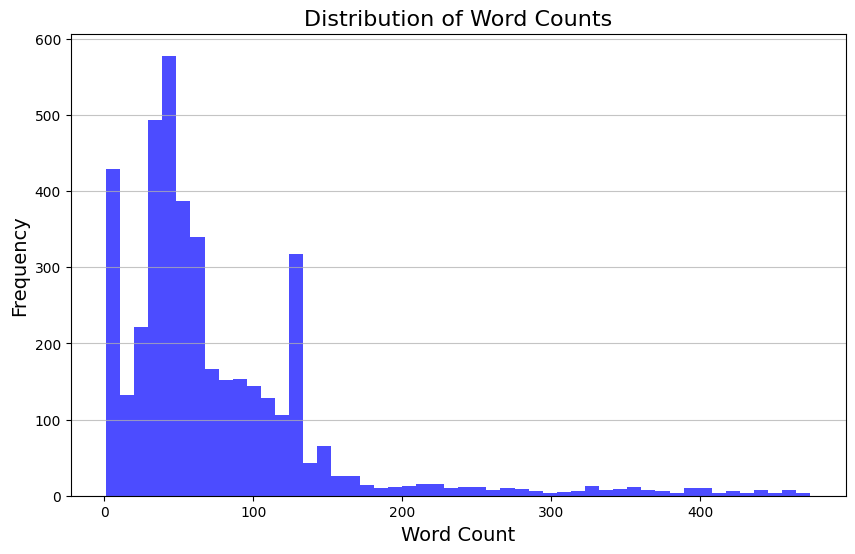

In [ ]:
plot_word_count_distribution(df_content_sub, 'text')

In [ ]:
# Yeni dosya legal
owi_dir = "/Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003"
owi_json2=  "/Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003.json"

In [ ]:
import os
import json
import pandas as pd

# Path to your directory with JSON files
dir_path = os.path.expanduser(owi_dir)

# List to store JSON data
data = []

# Open and read the JSON file
with open(os.path.join(dir_path, owi_json2), 'r') as file:
    # Load the JSON data into a Python object
    json_data = json.load(file)
    
    # Create a new dictionary to hold the scalar values
    scalar_data = {}
    for key, value in json_data.items():
        if not isinstance(value, (list, dict)):
            scalar_data[key] = value
    
    # Append the scalar data to the list
    data.append(scalar_data)

# Create a pandas DataFrame from the JSON data
df = pd.DataFrame(data)


In [ ]:
df

,last_modified_date,creation_date,user,dataset_type,schema
0,2025-04-30 09:44:43,2025-04-30 09:44:43,d7da5b32e031477dba16014556107ebb@eudat.eu,dataset,http://datacite.org/schema/kernel-4


In [ ]:
# Example usage:
directory = owi_dir
pattern = 'language=eng'

parquet_files = collect_parquet_files(directory, pattern)
print(f"found {len(parquet_files)} files") 

found 37 files


In [ ]:
# Read and concatenate all parquet files
df_all = pd.concat([pd.read_parquet(file) for file in parquet_files], ignore_index=True)
df_all

In [ ]:
df1 = pd.read_parquet(parquet_files[0]) 
df1

,id,record_id,title,main_content,json-ld,microdata,opengraph,warc_date,warc_ip,url,...,ows_genai_details,ows_fetch_response_time,ows_fetch_num_errors,outgoing_links,image_links,video_links,iframes,curlielabels,curlielabels_en,address
0,6cf88b33369736452f9986908b4aea028175400030861b...,c9673f3f-3f36-4257-b500-a3242c1decf4,imprint,"<a href=""/en"">\nMaison-Oyan\n</a>\n<a href=""ht...",None,None,"[{'namespace': {'og': 'http://ogp.me/ns#'}, 'p...",2025-03-24T01:05:22Z,104.155.59.202,https://maison-oyan.com/en/4340708/imprint,...,None,NaN,None,[{'src': 'http://www.instagram.com/baskenreise...,[{'src': 'https://l.icdbcdn.com/oh/ddd11d65-af...,None,[{'src': 'https://checkout.lodgify.com/steffen...,None,None,None
1,6cf8a54048fb3004493b8a1fa5302c9871ae15c35d7e95...,ab4808ea-7fa3-4c4e-a506-1e65bd443609,"One moment, please...",Please wait while your request is being verifi...,None,None,None,2025-03-22T19:11:22Z,75.102.22.151,https://calzadosmaja.com/coomeet-evaluate-expe...,...,None,NaN,None,None,None,None,None,None,None,None
2,6cf8cd7f57d86e327c09000f93ff550d07196accc3dd9e...,a8f6a9df-4849-442c-9d0f-7a73d46eb33b,Contact – Cine Paris Film Festival,<h2>Contact Us</h2>\n\n<p>Have questions or ne...,None,"[{'type': 'https://schema.org/WebPage', 'value...",None,2025-03-15T19:28:29Z,212.1.212.82,https://cineparisfilmfestival.com/index.php/co...,...,None,NaN,None,[{'src': 'https://cineparisfilmfestival.com/in...,[{'src': 'https://cineparisfilmfestival.com/wp...,None,None,None,None,None
3,6cf8d8d7326c2e74b23064c1890e747a656eb6a7c242cf...,b51d6abc-ff4a-47fc-9dee-52b0165f2059,Privacy Policy - Pangaea Club,"<a href=""https://pangaeaclub.net""> logo Home P...","[{'@context': 'https://schema.org', '@graph': ...",None,"[{'namespace': {'og': 'http://ogp.me/ns#', 'ar...",2025-03-18T14:33:26Z,162.159.134.42,https://pangaeaclub.net/privacy-policy-2/,...,None,NaN,None,[{'src': 'https://pangaeaclub.net/destinations...,[{'src': 'https://pangaeaclub.net/wp-content/t...,None,None,None,None,None
4,6cf9132079c494928049d1154879836c6bea349da4b6c2...,2d772fcb-5ab7-4c20-bd29-a9e0533e6ee2,Travel News Asia Search Pages: Apple,"<a href=""https://www.travelnewsasia.com""> Trav...",None,None,"[{'namespace': {'og': 'http://ogp.me/ns#'}, 'p...",2025-03-17T05:14:11Z,191.101.59.120,https://www.asiatraveltips.com/cgi-bin/search/...,...,None,NaN,None,[{'src': 'https://www.travelnewsasia.com/news2...,[{'src': 'https://www.asiatraveltips.com/newsp...,"[{'src': 'https://youtu.be/_73xGjB6dc8', 'widt...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,73e44922787cf8f11f7db1c1bf33d4dfaf00e4f05ceb2a...,6fbda6e0-b5c3-4282-b5cf-ffd23dfac922,Qatar Airways Holidays | Qatar Airways,Thumbnail Earn Qmiles\n\n<p>Helpful resources<...,None,None,"[{'namespace': {'og': 'http://ogp.me/ns#'}, 'p...",2025-03-18T14:24:10Z,104.21.40.71,https://holidays.qatarairways.com/en-id/contac...,...,None,NaN,None,[{'src': 'https://holidays.qatarairways.com/en...,[{'src': 'https://d2ksj7jw4c10d7.cloudfront.ne...,[{'src': 'https://www.youtube.com/user/qatarai...,[{'src': 'https://tui.freshdesk.com/support/ti...,None,None,None
16599,73e47fd9507d6fb47b9d44f42403a98b68472f9e1f0e9a...,93385b03-5246-47b3-a68c-0fe5f54f521c,Contact Magazine - Alumni and Community - Univ...,"<a href=""/"">Alumni and Community</a>\n<a href=...",None,None,None,2025-03-18T13:25:03Z,23.185.0.1,https://alumni.uq.edu.au/contact-magazine/node...,...,None,NaN,None,[{'src': 'https://www.teqsa.gov.au/national-re...,[{'src': 'https://alumni.uq.edu.au/sites/defau...,[{'src': 'https://www.youtube.com/user/univers...,[{'src': 'https://www.googletagmanager.com/ns....,None,None,None
16600,73e4806d2ecc2998976038088741c1e8b17a5d739e080d...,1f41601b-ed52-45f6-b923-81dab9a9be4f,Billion UK Forum - User Control Panel - Login,"<a href=""/forum/app.php/user/forgot_password?s...",None,"[{'type': 'https://schema.org/BreadcrumbList',...",None,2025-03-26T21:16:23Z,217.194.215.4,https://billion.uk.c

In [ ]:
df1.columns

Index(['id', 'record_id', 'title', 'main_content', 'json-ld', 'microdata',
       'opengraph', 'warc_date', 'warc_ip', 'url', 'url_scheme', 'url_path',
       'url_params', 'url_query', 'url_fragment', 'url_subdomain',
       'url_domain', 'url_suffix', 'url_is_private', 'mime_type', 'charset',
       'content_type_other', 'http_server', 'valid', 'warc_file',
       'warc_offset', 'schema_metadata', 'ows_canonical', 'ows_resource_type',
       'ows_curlielabel', 'ows_index', 'ows_genai', 'ows_genai_details',
       'ows_fetch_response_time', 'ows_fetch_num_errors', 'outgoing_links',
       'image_links', 'video_links', 'iframes', 'curlielabels',
       'curlielabels_en', 'address'],
      dtype='object')

In [ ]:
def process_df(df:pd.DataFrame):
    df = df.dropna(axis=1, how='all')
    df_content_sub = df[["title","main_content","url"]]
    # Apply the function to the 'main_content' column
    df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
    df_content_sub = df_content_sub.dropna(subset=['main_content'])
    df_content_sub['title'] = df_content_sub['title'].apply(clean_html)
    df_content_sub = df_content_sub.dropna(subset=['title'])
    df_content_sub['main_content'] = df_content_sub['main_content'].apply(preprocess_text)
    df_content_sub['title'] = df_content_sub['title'].apply(preprocess_text)
    df_content_sub['text'] = df_content_sub['title'] + " " + df_content_sub['main_content']
    df_content_sub = df_content_sub[["text","url"]]
    # Remove extra whitespace
    df_content_sub['text'] = df_content_sub['text'].str.strip()

    # Drop rows where 'text' is a single empty space or empty
    df_content_sub = df_content_sub[df_content_sub['text'] != '']
    df_content_sub = df_content_sub.dropna(subset=['text'])
    df_content_sub = df_content_sub[df_content_sub['text'].str.len() >= 2]
    df_content_sub['text'] = df_content_sub['text'].str.strip()
    return df_content_sub


In [ ]:
df1 = process_df(df1)
df1

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

,text,url
0,imprint MaisonOyan Book Now Sitz chemin de Men...,https://maison-oyan.com/en/4340708/imprint
1,One moment please Please wait while your reque...,https://calzadosmaja.com/coomeet-evaluate-expe...
2,Contact Cine Paris Film Festival Contact Us Ha...,https://cineparisfilmfestival.com/index.php/co...
3,Privacy Policy Pangaea Club logo Home Page For...,https://pangaeaclub.net/privacy-policy-2/
4,Travel News Asia Search Pages Apple Travel Ind...,https://www.asiatraveltips.com/cgi-bin/search/...
...,...,...
16598,Qatar Airways Holidays Qatar Airways Thumbnail...,https://holidays.qatarairways.com/en-id/contac...
16599,Contact Magazine Alumni and Community Universi...,https://alumni.uq.edu.au/contact-magazine/node...
16600,Billion UK Forum User Control Panel Login I fo...,https://billion.uk.com/forum/ucp.php?mode=logi...
16601,Accelerator Title Authors,https://store.legal.thomsonreuters.com/law-pro...


In [ ]:
output_path = "../data/raw/owi/it4i_legal.csv"

for i,file in enumerate(parquet_files):
    print(f"Processing: {file}")
    df = pd.read_parquet(file)
    df_content_sub = process_df(df)
    if i == 0:
        df_content_sub.to_csv(output_path, index=False)
    else:
        df_content_sub.to_csv(output_path, mode='a', header=False, index=False)
print(f"Data saved to {output_path}")

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_16.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_29.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_4.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look lik

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_30.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_20.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_21.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_31.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_5.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look lik

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_17.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_28.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_33.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_7.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_23.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_15.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_14.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_22.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_6.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_32.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_3.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look lik

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_27.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_18.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_11.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_10.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_26.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_36.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_2.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_19.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_9.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_12.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_34.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_0.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_24.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_25.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)


Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_1.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_35.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look lik

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_8.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, th

Processing: /Users/ngumus/.owi/public/main/bdf7b63e-25a7-11f0-9249-0242ac140003/year=2025/month=4/day=29/language=eng/metadata_13.parquet


/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/569582580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content_sub['main_content'] = df_content_sub['main_content'].apply(clean_html)
/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/1135109623.py:68: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look lik

Data saved to ../data/raw/owi/it4i_legal.csv


In [ ]:
dff_all = pd.read_csv(output_path)
dff_all

,text,url
0,imprint MaisonOyan Book Now Sitz chemin de Men...,https://maison-oyan.com/en/4340708/imprint
1,One moment please Please wait while your reque...,https://calzadosmaja.com/coomeet-evaluate-expe...
2,Contact Cine Paris Film Festival Contact Us Ha...,https://cineparisfilmfestival.com/index.php/co...
3,Privacy Policy Pangaea Club logo Home Page For...,https://pangaeaclub.net/privacy-policy-2/
4,Travel News Asia Search Pages Apple Travel Ind...,https://www.asiatraveltips.com/cgi-bin/search/...
...,...,...
603959,Location Arrival Hotel Briem Westendorf infoho...,https://www.hotelbriem.com/en/contact/location...
603960,Law Offices of Guercio and Guercio LLP Partner...,https://www.guerciolaw.com/partner-kathy-ahear...
603961,Contact Us LETE Contact Us Germantown Ave Phil...,https://shoplaete.com/pages/contact
603962,Bridal Shows Connecticut Terms of Use TERMS OF...,https://bridalshowsct.com/legal/terms-of-use


In [26]:
dff_all

,text,url
0,imprint MaisonOyan Book Now Sitz chemin de Men...,https://maison-oyan.com/en/4340708/imprint
1,One moment please Please wait while your reque...,https://calzadosmaja.com/coomeet-evaluate-expe...
2,Contact Cine Paris Film Festival Contact Us Ha...,https://cineparisfilmfestival.com/index.php/co...
3,Privacy Policy Pangaea Club logo Home Page For...,https://pangaeaclub.net/privacy-policy-2/
4,Travel News Asia Search Pages Apple Travel Ind...,https://www.asiatraveltips.com/cgi-bin/search/...
...,...,...
603959,Location Arrival Hotel Briem Westendorf infoho...,https://www.hotelbriem.com/en/contact/location...
603960,Law Offices of Guercio and Guercio LLP Partner...,https://www.guerciolaw.com/partner-kathy-ahear...
603961,Contact Us LETE Contact Us Germantown Ave Phil...,https://shoplaete.com/pages/contact
603962,Bridal Shows Connecticut Terms of Use TERMS OF...,https://bridalshowsct.com/legal/terms-of-use


In [27]:
dff_all['word_count'] = dff_all['text'].apply(lambda x: len(x.split()))
dff_all['word_count'].describe()

count    603964.000000
mean        614.812929
std        1804.227599
min           1.000000
25%          44.000000
50%         187.000000
75%         572.000000
max      427254.000000
Name: word_count, dtype: float64

In [40]:
quantile_95 = dff_all['word_count'].quantile(0.95)
quantile_5th = dff_all['word_count'].quantile(0.05)
print(f"95th percentile: {quantile_95}")
print(f"5th percentile: {quantile_5th}")

95th percentile: 2723.0
5th percentile: 8.0


In [42]:
filtered_data = dff_all[(dff_all['word_count'] < quantile_95) & (dff_all['word_count'] > quantile_5th)]
filtered_data

,text,url,word_count
0,imprint MaisonOyan Book Now Sitz chemin de Men...,https://maison-oyan.com/en/4340708/imprint,33
1,One moment please Please wait while your reque...,https://calzadosmaja.com/coomeet-evaluate-expe...,11
2,Contact Cine Paris Film Festival Contact Us Ha...,https://cineparisfilmfestival.com/index.php/co...,30
3,Privacy Policy Pangaea Club logo Home Page For...,https://pangaeaclub.net/privacy-policy-2/,397
4,Travel News Asia Search Pages Apple Travel Ind...,https://www.asiatraveltips.com/cgi-bin/search/...,532
...,...,...,...
603959,Location Arrival Hotel Briem Westendorf infoho...,https://www.hotelbriem.com/en/contact/location...,24
603960,Law Offices of Guercio and Guercio LLP Partner...,https://www.guerciolaw.com/partner-kathy-ahear...,90
603961,Contact Us LETE Contact Us Germantown Ave Phil...,https://shoplaete.com/pages/contact,10
603962,Bridal Shows Connecticut Terms of Use TERMS OF...,https://bridalshowsct.com/legal/terms-of-use,2309


In [43]:
filtered_data["word_count"] = filtered_data["word_count"].astype(int)
filtered_data["word_count"].describe() 

/var/folders/3f/6g751cj549sbdzh4d8njjpx80000gn/T/ipykernel_65330/2092528953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["word_count"] = filtered_data["word_count"].astype(int)


count    539842.000000
mean        407.142231
std         526.888870
min           9.000000
25%          51.000000
50%         192.000000
75%         512.000000
max        2722.000000
Name: word_count, dtype: float64

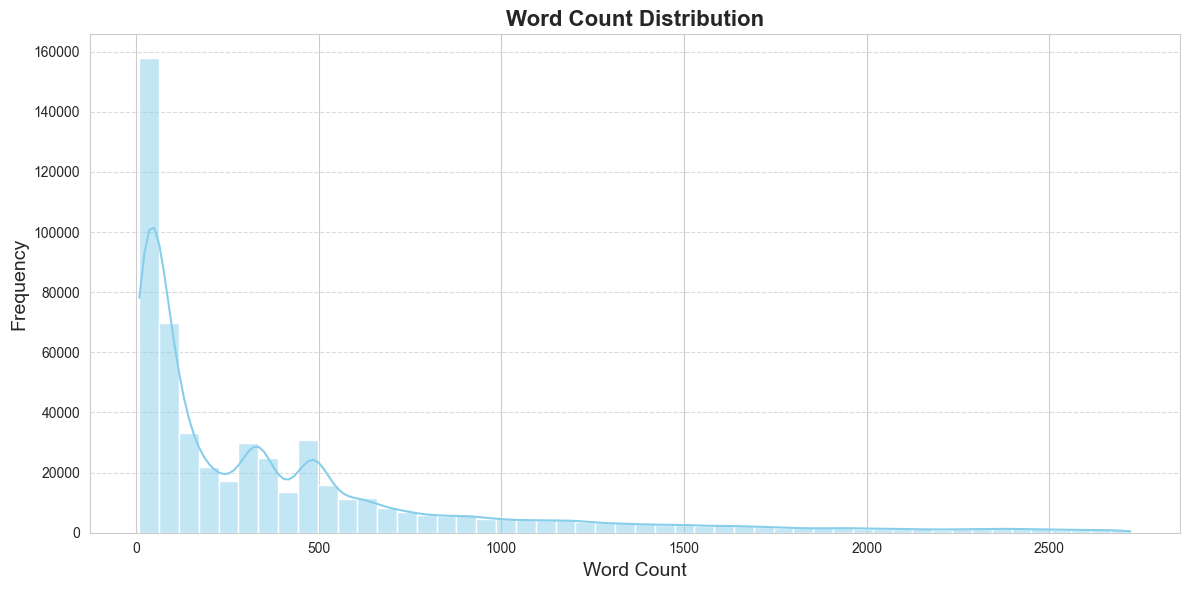

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the word count histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='word_count', bins=50, kde=True, color='skyblue')

# Add titles and labels
plt.title('Word Count Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the grid and style
sns.set_style("whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

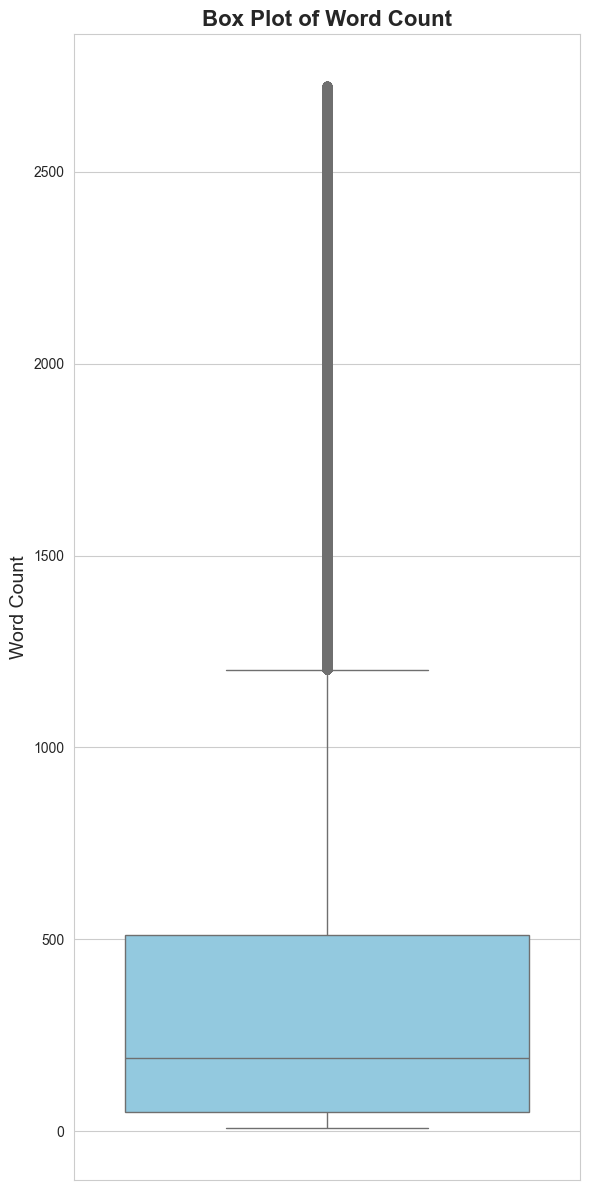

In [48]:
plt.figure(figsize=(6, 12))
sns.boxplot(data=filtered_data, y='word_count', color='skyblue')
sns.set_style("whitegrid")

# Add titles and labels
plt.title('Box Plot of Word Count', fontsize=16, fontweight='bold')
plt.ylabel('Word Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
filtered_data.to_csv("../data/processed/owi/it4i_legal.csv", index=False)

In [2]:
df = pd.read_csv("../data/processed/owi/it4i_legal.csv")
df

,text,url,word_count
0,imprint MaisonOyan Book Now Sitz chemin de Men...,https://maison-oyan.com/en/4340708/imprint,33
1,One moment please Please wait while your reque...,https://calzadosmaja.com/coomeet-evaluate-expe...,11
2,Contact Cine Paris Film Festival Contact Us Ha...,https://cineparisfilmfestival.com/index.php/co...,30
3,Privacy Policy Pangaea Club logo Home Page For...,https://pangaeaclub.net/privacy-policy-2/,397
4,Travel News Asia Search Pages Apple Travel Ind...,https://www.asiatraveltips.com/cgi-bin/search/...,532
...,...,...,...
539837,Location Arrival Hotel Briem Westendorf infoho...,https://www.hotelbriem.com/en/contact/location...,24
539838,Law Offices of Guercio and Guercio LLP Partner...,https://www.guerciolaw.com/partner-kathy-ahear...,90
539839,Contact Us LETE Contact Us Germantown Ave Phil...,https://shoplaete.com/pages/contact,10
539840,Bridal Shows Connecticut Terms of Use TERMS OF...,https://bridalshowsct.com/legal/terms-of-use,2309


In [3]:
df['word_count'].describe()

count    539842.000000
mean        407.142231
std         526.888870
min           9.000000
25%          51.000000
50%         192.000000
75%         512.000000
max        2722.000000
Name: word_count, dtype: float64